<a href="https://colab.research.google.com/github/hxyder/xiaoyu/blob/Bank-Customer-Churn/update_Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. Dataset information.

# Part 1: Data Exploration

## Part 1.1: Understand the Raw Dataset

In [ ]:
 import pandas as pd
 import numpy as np

In [ ]:
df = pd.read_csv("bank.data.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are total 12 variables and 1 label

In [ ]:
#check the unique values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#get the target variable
y = df['Exited']

## Part 1.2: Understand the features

In [ ]:
#check missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there is no null value in each column


In [ ]:
# Numerical feature
numerical = df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']]
df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [ ]:
#check the feature distribution
import matplotlib.pyplot as plt
import seaborn as sns

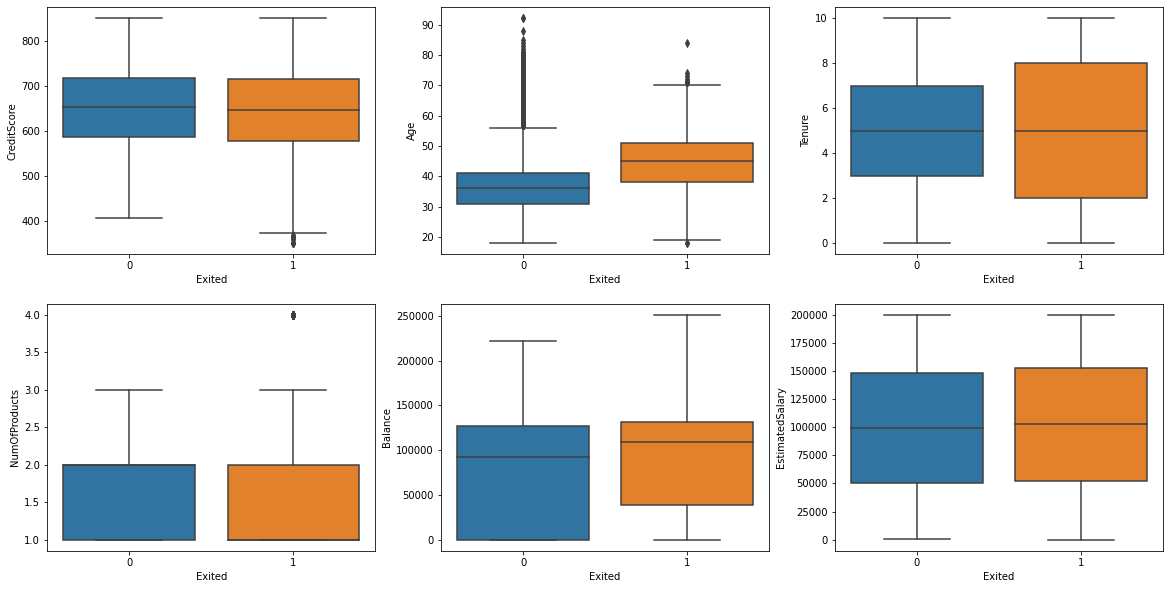

In [ ]:
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])



We can find that older customer prefer exite, num of products do not have much different, pepole who have a higher balance prefer exite. 

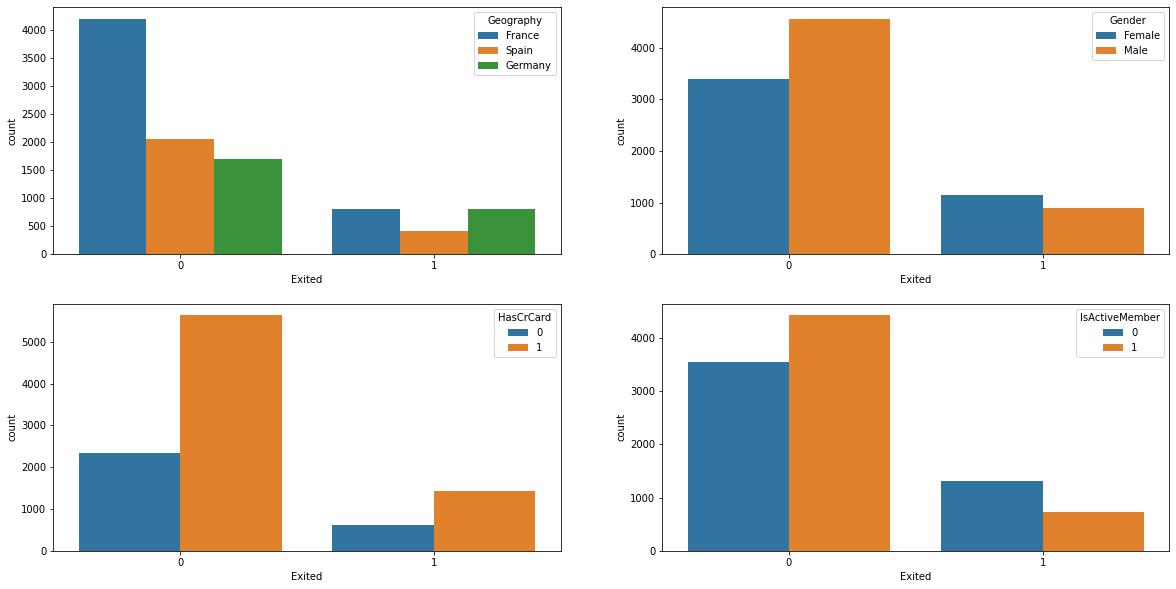

In [ ]:
# categorical feature
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

# Part 2: Feature Preprocessing

In [ ]:
# drop useless feature
drop_feature = ['RowNumber','CustomerId','Surname','Exited']
X = df.drop(drop_feature, axis= 1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
#seperate by categorical and numerial
categ_col = X.columns[X.dtypes=='object']
num_col = X.columns[(X.dtypes=='int64')|(X.dtypes=='float64')]

In [ ]:
#split dataset
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 1)

In [ ]:
# get dummy variable
def get_dummy(daf,categories):
  transfo = pd.get_dummies(daf[categories])
  return pd.concat([daf,transfo],axis = 1).drop(categories, axis=1)



In [ ]:
categories = ['Geography','Gender']
X_train = get_dummy(X_train,categories)
X_test = get_dummy(X_test,categories)

In [ ]:
X_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7971,633,42,10,0.00,1,0,1,79408.17,0,0,1,0,1
9152,708,23,4,71433.08,1,1,0,103697.57,0,1,0,1,0
6732,548,37,9,0.00,2,0,0,98029.58,1,0,0,1,0
902,645,48,7,90612.34,1,1,1,149139.13,1,0,0,1,0
2996,729,45,7,91091.06,2,1,0,71133.12,0,0,1,1,0


In [ ]:
X_test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2660,767,44,2,152509.25,1,1,1,136915.15,1,0,0,1,0
3535,662,37,5,94901.09,1,1,1,48233.75,0,0,1,0,1
9695,710,37,6,135795.63,1,0,1,46523.60,0,1,0,0,1
6686,621,50,3,163085.79,1,0,1,131048.36,0,0,1,0,1
7155,515,45,7,120961.50,3,1,1,39288.11,0,1,0,0,1


Standardize/Normalize Data

In [ ]:
# use standarscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[num_col])
X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7971,-0.172985,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0,0,1,0,1
9152,0.602407,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0,1,0,1,0
6732,-1.051762,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1,0,0,1,0
902,-0.048922,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1,0,0,1,0
2996,0.819517,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0,0,1,1,0


# Part 3: Model Training and Result Evaluation

## Part 3.1: Model Training

In [ ]:
# we gonna use 3 different model randomforest,KNN and Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic
classifer_logi = LogisticRegression()

# KNN
classifer_knn = KNeighborsClassifier()

# RF
classifer_rf = RandomForestClassifier()

In [ ]:
# train model
classifer_logi.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# prediction for test
classifer_logi.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of test data
classifer_logi.score(X_test, y_test)

0.8084

In [ ]:
# use Cross Validation to get the accuracy for differnt models
names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifer_logi, classifer_knn, classifer_rf]
i = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + names[i] + ' is ' + str(cv_score.mean()))
    i +=1

[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124
[0.83266667 0.84133333 0.826      0.83533333 0.83666667]
Model accuracy of KNN is 0.8343999999999999
[0.87866667 0.86       0.85466667 0.85666667 0.862     ]
Model accuracy of Random Forest is 0.8624


## Part 3.2: Use Grid Search to Find Optimal Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV


def print_best_score(gsearch,param_test):
     
    print("Best score: %0.3f" % gsearch.best_score_)
    print("Best parameters set:")
    
    best_parameters = gsearch.best_estimator_.get_params()
    for param_name in sorted(param_test.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))



In [ ]:
parameters = {
    'penalty':['l2'], 
    'C':(0.01, 0.05, 0.1, 0.2, 1)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1), 'penalty': ['l2']})

In [ ]:
print_best_score(Grid_LR,parameters)

Best score: 0.812
Best parameters set:
	C: 1
	penalty: 'l2'


In [ ]:
best_lr = Grid_LR.best_estimator_

In [ ]:
best_lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
best_lr.score(X_test,y_test)

0.808

## Part 3.2.2: Find Optimal Hyperparameters: KNN

In [ ]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [ ]:
print_best_score(Grid_KNN,parameters)

Best score: 0.841
Best parameters set:
	n_neighbors: 9


In [ ]:
best_knn = Grid_KNN.best_estimator_

## Part 3.2.3: Find Optimal Hyperparameters: Random Forest

In [ ]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}

Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [ ]:
print_best_score(Grid_RF,parameters)

Best score: 0.865
Best parameters set:
	max_depth: 10
	n_estimators: 60


In [ ]:
best_rf = Grid_RF.best_estimator_

## Part 3.3: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# calculate accuracy, precision and recall

def model_evaluation(classifer,cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
  precision = tp / (tp + fp + 0.0)
  recall = tp / (tp + fn + 0.0)
  print ("Accuracy is: " + str(accuracy))
  print ("precision is: " + str(precision))
  print ("recall is: " + str(recall))
  print ()

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        model_evaluation(classifier, cm)

In [ ]:
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_rf.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_lr.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_knn.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Accuracy is: 0.8584
precision is: 0.7946768060836502
recall is: 0.4106090373280943

Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289

Accuracy is: 0.8368
precision is: 0.7028112449799196
recall is: 0.343811394891945



## Part 3.4: Model Evaluation - ROC & AUC

### Part 3.4.1: ROC of RF Model

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [ ]:
y_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,y_prob)
metrics.auc(fpr,tpr)

0.841406170596762

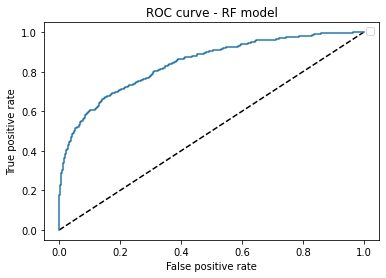

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

### Part 3.4.1: ROC of LR Model

In [ ]:
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_prob_lr)
metrics.auc(fpr_lr,tpr_lr)

0.7722324132466433

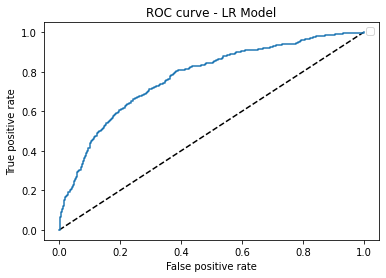

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()